## Import Liberaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Changing Directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-house-price-prediction/notebooks'

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory") 

You set a new current directory


In [6]:
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-house-price-prediction'

## Loading Data

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

In [9]:
# Download the dataset from Kaggle
KaggleDatasetPath = "codeinstitute/housing-prices-data"
DestinationFolder = "data/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/codeinstitute/housing-prices-data
License(s): unknown


In [10]:
# Unzip the dataset
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

Archive:  data/raw/housing-prices-data.zip
  inflating: data/raw/house-metadata.txt  
  inflating: data/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv  
  inflating: data/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv  


  - Inspecting data

In [11]:
data = pd.read_csv(f"data/raw/house_prices_records.csv")
data.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [12]:
data.shape

(1460, 24)

In [13]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

In [14]:

data.describe()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

  - Missing data

MasVnrArea          8
BsmtExposure       38
GarageYrBlt        81
2ndFlrSF           86
BedroomAbvGr       99
BsmtFinType1      145
GarageFinish      235
LotFrontage       259
WoodDeckSF       1305
EnclosedPorch    1324
dtype: int64


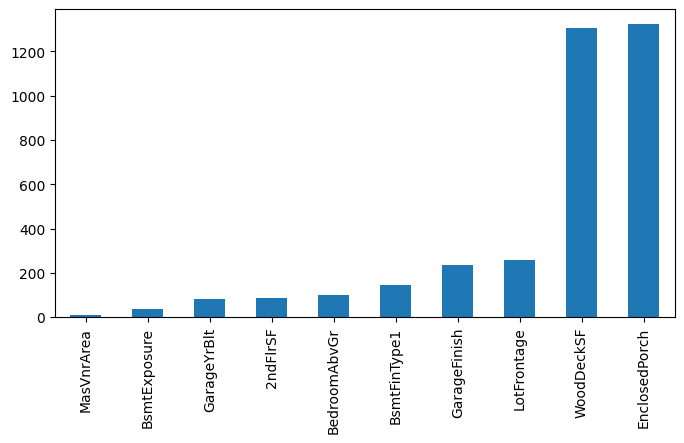

In [16]:
# Grab the all columns which have missing values
# Plotting the missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(8, 4))
missing.plot.bar()
print(missing)

As I can see in the last 2 features there are too many Nan value which is not good for my model

## Histogram

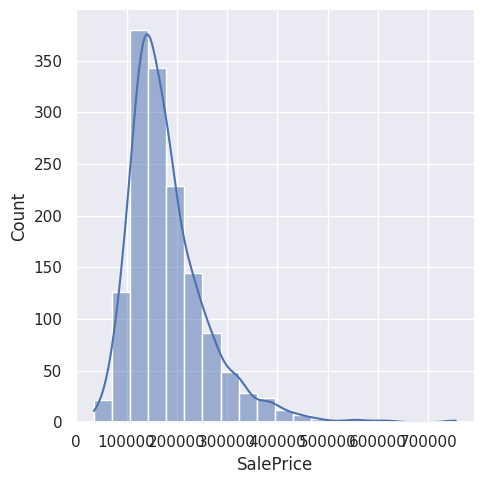

In [17]:
# Check sale price distribution
sns.set_theme(rc={'figure.figsize':(12, 6)})
sns.displot(data["SalePrice"], kde=True, bins = 20)


We are aiming to predict house price so SalePrice is our label or target

In [19]:

data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

I can see categoric and numeric data type so I will devide them

### Numeric data

In [20]:
import numpy as np
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

### Categoric data

In [21]:
categorical_features = data.select_dtypes(exclude=[np.number])
categorical_features.columns

Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')

### Missing data in categorical data

In [23]:
# Check the missing data quantity
categorical_features.isna().sum()

BsmtExposure     38
BsmtFinType1    145
GarageFinish    235
KitchenQual       0
dtype: int64

In [24]:
# inspect the unique values in each categorical column.
for col in categorical_features.columns:
    print(f"Unique values in {col}:")
    print(categorical_features[col].value_counts())
    print()


Unique values in BsmtExposure:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

Unique values in BsmtFinType1:
BsmtFinType1
Unf    396
GLQ    385
ALQ    202
BLQ    136
Rec    126
LwQ     70
Name: count, dtype: int64

Unique values in GarageFinish:
GarageFinish
Unf    546
RFn    366
Fin    313
Name: count, dtype: int64

Unique values in KitchenQual:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64



In [25]:
print(categorical_features.head())

  BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           No          GLQ          RFn          Gd
1           Gd          ALQ          RFn          TA
2           Mn          GLQ          RFn          Gd
3           No          ALQ          Unf          Gd
4           Av          GLQ          RFn          Gd


### Encoding

To use heatmap we need to encode the words to numbers and first of all we should decide how to handle missing data. For here I fill them with No and it means not have.

In [27]:
# ~3% missing — small enough to impute with "No"
data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
data['GarageFinish'] = data['GarageFinish'].fillna('No')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No')

categorical_features = data[['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']]
print(categorical_features.head())

  BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           No          GLQ          RFn          Gd
1           Gd          ALQ          RFn          TA
2           Mn          GLQ          RFn          Gd
3           No          ALQ          Unf          Gd
4           Av          GLQ          RFn          Gd


Now I have a cleaned categorical variables
  - I can encode them now by using Label Encoding or One-Hot Encodding
  - If categorical have natural order uses Label Encoding and if they have nominal (no order) use One-Hot Encoding so here I have ordered categorise

  - BsmtExposure	Somewhat ordered (Gd > Av > Mn > No)	Label Encoding ✅
  - BsmtFinType1	Yes (GLQ better than Unf, etc.)	Label Encoding ✅
  - GarageFinish	Yes (Fin > RFn > Unf)	Label Encoding ✅
  - KitchenQual	Definitely ordered (Ex > Gd > TA > Fa)	Label Encoding ✅

In [28]:
# Define the ordered categories with 'No' as the worst value (0)
ordered_bsmt_exposure = ['No', 'Mn', 'Av', 'Gd']
ordered_bsmt_fintype1 = ['No', 'Unf', 'LwQ', 'BLQ', 'Rec', 'ALQ', 'GLQ']
ordered_garagefinish = ['No', 'Unf', 'RFn', 'Fin']
ordered_kitchenqual = ['No', 'Fa', 'TA', 'Gd', 'Ex']

# Manually create encoding based on the ordered categories
encoding_map_bsmt_exposure = {value: idx for idx, value in enumerate(ordered_bsmt_exposure)}
encoding_map_bsmt_fintype1 = {value: idx for idx, value in enumerate(ordered_bsmt_fintype1)}
encoding_map_garagefinish = {value: idx for idx, value in enumerate(ordered_garagefinish)}
encoding_map_kitchenqual = {value: idx for idx, value in enumerate(ordered_kitchenqual)}

# Apply the encoding maps to the respective columns
data['BsmtExposure'] = data['BsmtExposure'].map(encoding_map_bsmt_exposure)
data['BsmtFinType1'] = data['BsmtFinType1'].map(encoding_map_bsmt_fintype1)
data['GarageFinish'] = data['GarageFinish'].map(encoding_map_garagefinish)
data['KitchenQual'] = data['KitchenQual'].map(encoding_map_kitchenqual)

# Fill NaN values with 0 (or any appropriate value you prefer, here we use 0 for the worst case)
data['BsmtExposure'] = data['BsmtExposure'].fillna(0)
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(0)
data['GarageFinish'] = data['GarageFinish'].fillna(0)
data['KitchenQual'] = data['KitchenQual'].fillna(0)

# Verify the unique values after encoding
print("Unique values in BsmtExposure after encoding:", data['BsmtExposure'].unique())
print("Unique values in BsmtFinType1 after encoding:", data['BsmtFinType1'].unique())
print("Unique values in GarageFinish after encoding:", data['GarageFinish'].unique())
print("Unique values in KitchenQual after encoding:", data['KitchenQual'].unique())

# Output the encoded DataFrame (optional)
print("Encoded DataFrame:")
print(data[['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']].head(10))



Unique values in BsmtExposure after encoding: [0 3 1 2]
Unique values in BsmtFinType1 after encoding: [6 5 1 4 0 3 2]
Unique values in GarageFinish after encoding: [2 1 0 3]
Unique values in KitchenQual after encoding: [3 2 4 1]
Encoded DataFrame:
   BsmtExposure  BsmtFinType1  GarageFinish  KitchenQual
0             0             6             2            3
1             3             5             2            2
2             1             6             2            3
3             0             5             1            3
4             2             6             2            3
5             0             6             1            2
6             2             6             2            3
7             1             5             0            2
8             0             1             1            2
9             0             6             2            2


### Checking Correlation

In [29]:
# Check correlation
correlations = data[categorical_features.columns.tolist() + ['SalePrice']].corr()

# Only the correlations with SalePrice
correlations_with_target = correlations['SalePrice'].drop('SalePrice')  # remove self-correlation

# Sort by strength of correlation
correlations_with_target = correlations_with_target.abs().sort_values(ascending=False)

print(correlations_with_target)

KitchenQual     0.659600
GarageFinish    0.404100
BsmtExposure    0.361863
BsmtFinType1    0.254346
Name: SalePrice, dtype: float64


  - Features with correlation > 0.4 are considered useful for me, so KtchenQual and GarageFinish


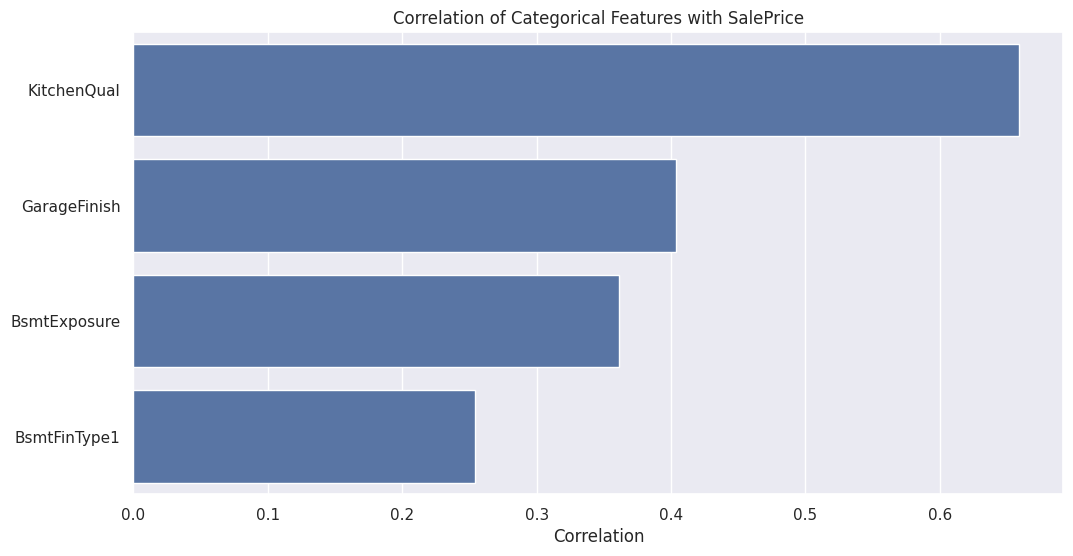

In [30]:
correlations = {
    'KitchenQual': 0.659,
    'GarageFinish': 0.404,
    'BsmtExposure': 0.361,
    'BsmtFinType1': 0.254
}

sns.barplot(x=list(correlations.values()), y=list(correlations.keys()))
plt.title('Correlation of Categorical Features with SalePrice')
plt.xlabel('Correlation')
plt.show()

### Heatmap

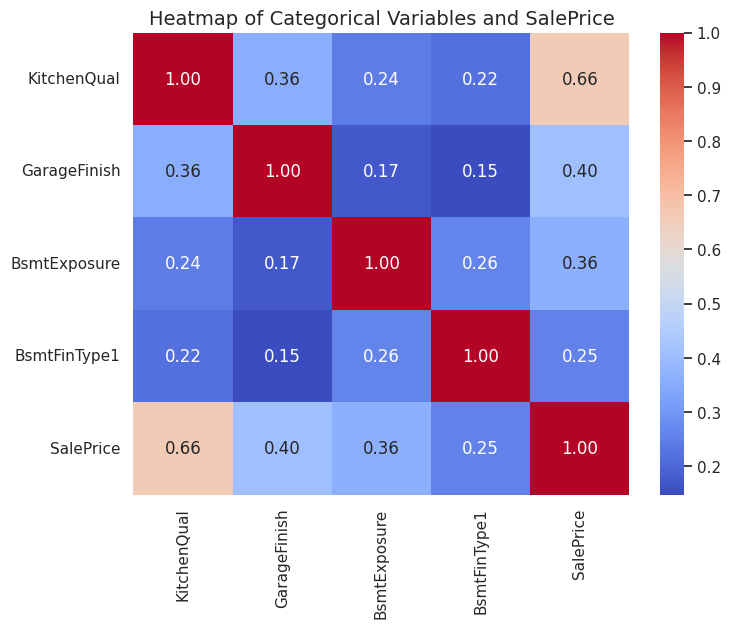

In [31]:
selected = data[['KitchenQual', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'SalePrice']]

# Compute correlation matrix
corr = selected.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Categorical Variables and SalePrice', fontsize=14)
plt.show()

In [32]:
# Select only the important features
important_categorical_features = data[['KitchenQual', 'GarageFinish']]

# Preview to confirm
print(important_categorical_features.head())


   KitchenQual  GarageFinish
0            3             2
1            2             2
2            3             2
3            3             1
4            3             2


## Correlation of Numerical Features

As I can see in the correclation below there is no strong negative correlation

In [33]:
correlation = numeric_features.corr()
correlation_with_saleprice = correlation["SalePrice"].sort_values(ascending = False)
print(correlation_with_saleprice)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
BedroomAbvGr     0.161901
OverallCond     -0.077856
EnclosedPorch   -0.176458
Name: SalePrice, dtype: float64


In [34]:
# Select variables with correlation greater than 0.5
high_correlation = correlation_with_saleprice[correlation_with_saleprice > 0.5]

# Print the result
print(high_correlation)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


  - Check high corr data have missing data or not

In [36]:
missing = high_correlation[high_correlation.isnull()]

def missing_values(missing, high_correlation):
    """This function takes a list of missing values and a list of high 
    correlation featuresto check if the missing values are in the high
    correlation features.
    """
    return [feature for feature in missing if feature in high_correlation]

missing_values = missing_values(missing, high_correlation)
print(missing_values)


[]


there is no missing value

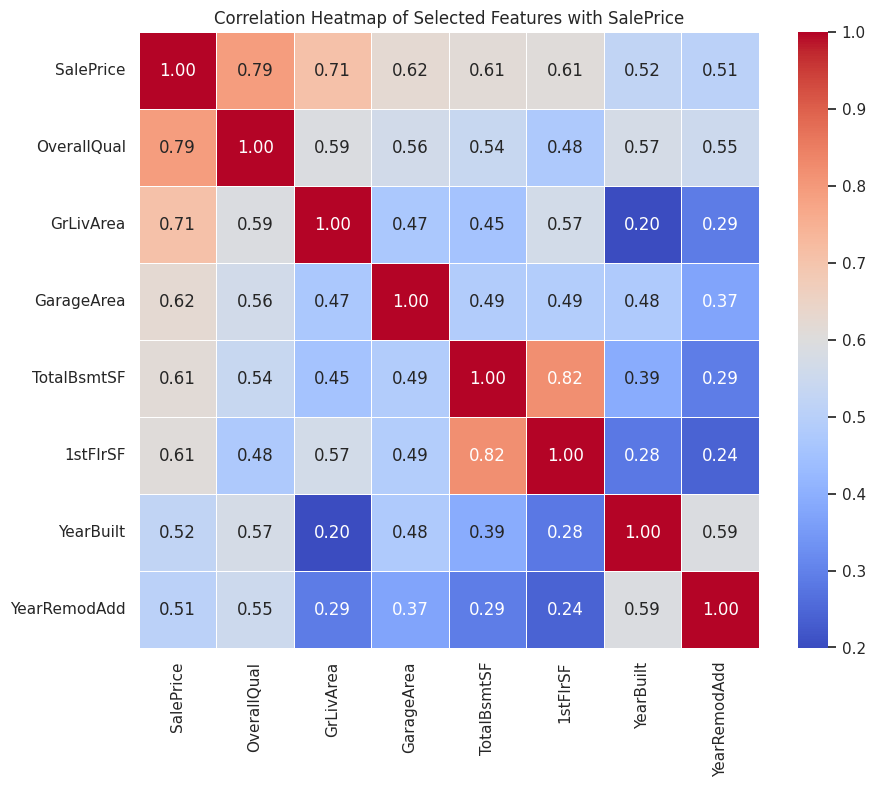

In [37]:
# Use features with correlation > 0.5
selected_features = high_correlation.index.tolist()

# Create the correlation matrix for the selected features
correlation_matrix = numeric_features[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features with SalePrice')
plt.show()

In [38]:
important_numerical_features = data[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF','1stFlrSF','YearBuilt','YearRemodAdd']]

## High Correlation Numerical and Categorical Features 

  - I have numeric and categoric data which has strong correlation with saleprice

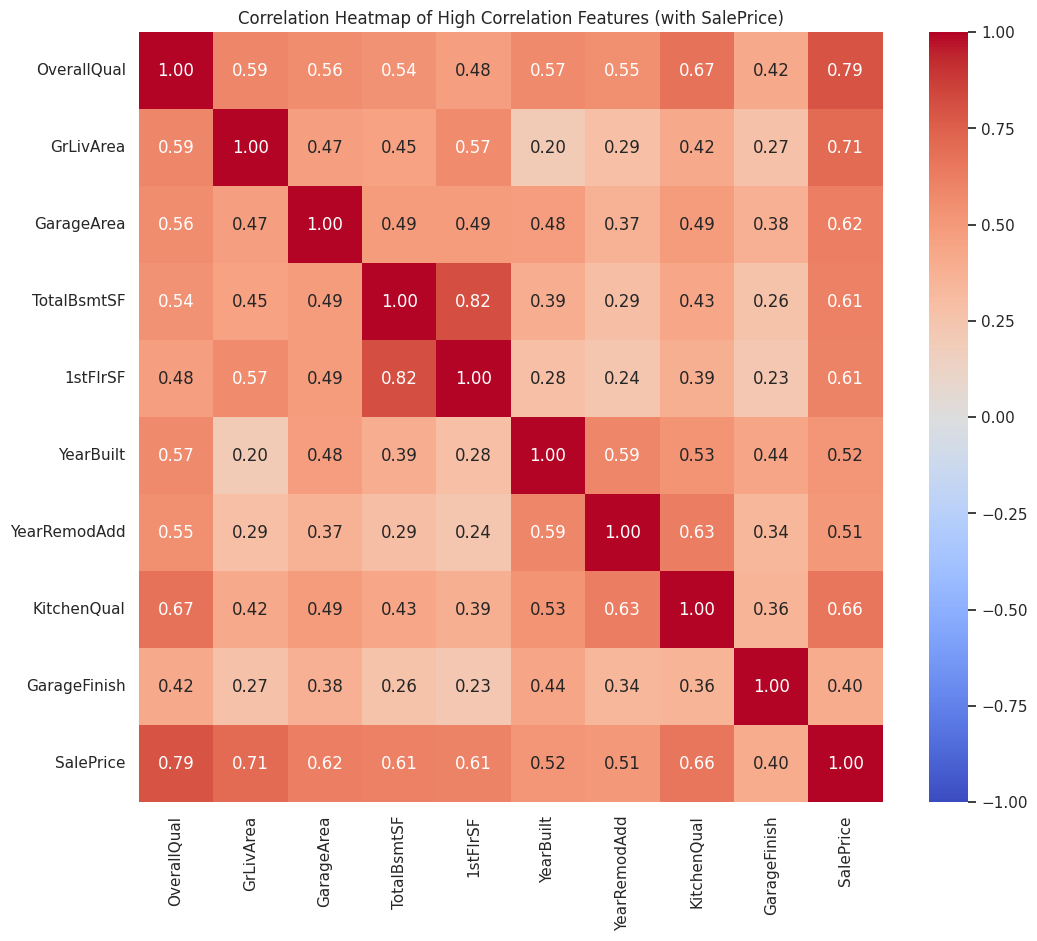

In [39]:
# Concatenate the encoded categorical features and the high-correlation numerical features
# Add SalePrice to your final_correlation
final_correlation = pd.concat([important_numerical_features, important_categorical_features, data[['SalePrice']]], axis=1)

correlation_matrix = final_correlation.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of High Correlation Features (with SalePrice)')
plt.show()

In [41]:
# I can see on the heatmap the 1stFlsSF and TotalBsmtSF are highly correlated with each other (multicollinearity)
# I will remove one with lower correlation with SalePrice
cleaned_corr_data = final_correlation.drop(columns='1stFlrSF')
print(cleaned_corr_data.columns)

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd', 'KitchenQual', 'GarageFinish', 'SalePrice'],
      dtype='object')


In [42]:
cleaned_corr_data.to_csv('data/processed/cleaned_corr_data.csv', index=False)